In [2]:
import pandas as pd

# Load the dataset
file_path = 'Obesity Classification.csv'
data = pd.read_csv(file_path)

# Display basic information about the dataset
print(data.info())
print(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      108 non-null    int64  
 1   Age     108 non-null    int64  
 2   Gender  108 non-null    object 
 3   Height  108 non-null    int64  
 4   Weight  108 non-null    int64  
 5   BMI     108 non-null    float64
 6   Label   108 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 6.0+ KB
None
   ID  Age  Gender  Height  Weight   BMI          Label
0   1   25    Male     175      80  25.3  Normal Weight
1   2   30  Female     160      60  22.5  Normal Weight
2   3   35    Male     180      90  27.3     Overweight
3   4   40  Female     150      50  20.0    Underweight
4   5   45    Male     190     100  31.2          Obese


In [6]:
print(data.columns)


Index(['ID', 'Age', 'Gender', 'Height', 'Weight', 'BMI', 'Label'], dtype='object')


In [8]:
import pandas as pd

# Load the dataset
file_path = 'Obesity Classification.csv'
data = pd.read_csv(file_path)

# Display basic information about the dataset
print(data.info())
print(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      108 non-null    int64  
 1   Age     108 non-null    int64  
 2   Gender  108 non-null    object 
 3   Height  108 non-null    int64  
 4   Weight  108 non-null    int64  
 5   BMI     108 non-null    float64
 6   Label   108 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 6.0+ KB
None
   ID  Age  Gender  Height  Weight   BMI          Label
0   1   25    Male     175      80  25.3  Normal Weight
1   2   30  Female     160      60  22.5  Normal Weight
2   3   35    Male     180      90  27.3     Overweight
3   4   40  Female     150      50  20.0    Underweight
4   5   45    Male     190     100  31.2          Obese


In [10]:
print(data.isnull().sum())


ID        0
Age       0
Gender    0
Height    0
Weight    0
BMI       0
Label     0
dtype: int64


In [12]:
print(data.dtypes)


ID          int64
Age         int64
Gender     object
Height      int64
Weight      int64
BMI       float64
Label      object
dtype: object


In [14]:
print(data['Label'].value_counts())


Underweight      47
Normal Weight    29
Overweight       20
Obese            12
Name: Label, dtype: int64


In [16]:
data.fillna(method='ffill', inplace=True)


In [18]:
from sklearn.preprocessing import LabelEncoder

# Example for encoding categorical variables, if any
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])


In [20]:
from sklearn.model_selection import train_test_split

X = data.drop('Label', axis=1)
y = data['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [24]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0
Classification Report:
                precision    recall  f1-score   support

Normal Weight       1.00      1.00      1.00         6
        Obese       1.00      1.00      1.00         4
   Overweight       1.00      1.00      1.00         4
  Underweight       1.00      1.00      1.00         8

     accuracy                           1.00        22
    macro avg       1.00      1.00      1.00        22
 weighted avg       1.00      1.00      1.00        22



In [26]:
from sklearn.tree import export_text

tree_rules = export_text(model, feature_names=list(X.columns))
print(tree_rules)


|--- Weight <= 52.50
|   |--- class: Underweight
|--- Weight >  52.50
|   |--- BMI <= 24.60
|   |   |--- class: Normal Weight
|   |--- BMI >  24.60
|   |   |--- Weight <= 97.50
|   |   |   |--- Weight <= 82.50
|   |   |   |   |--- Weight <= 77.50
|   |   |   |   |   |--- class: Overweight
|   |   |   |   |--- Weight >  77.50
|   |   |   |   |   |--- class: Normal Weight
|   |   |   |--- Weight >  82.50
|   |   |   |   |--- class: Overweight
|   |   |--- Weight >  97.50
|   |   |   |--- class: Obese



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      108 non-null    int64  
 1   Age     108 non-null    int64  
 2   Gender  108 non-null    object 
 3   Height  108 non-null    int64  
 4   Weight  108 non-null    int64  
 5   BMI     108 non-null    float64
 6   Label   108 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 6.0+ KB
None
   ID  Age  Gender  Height  Weight   BMI          Label
0   1   25    Male     175      80  25.3  Normal Weight
1   2   30  Female     160      60  22.5  Normal Weight
2   3   35    Male     180      90  27.3     Overweight
3   4   40  Female     150      50  20.0    Underweight
4   5   45    Male     190     100  31.2          Obese
Underweight      47
Normal Weight    29
Overweight       20
Obese            12
Name: Label, dtype: int64


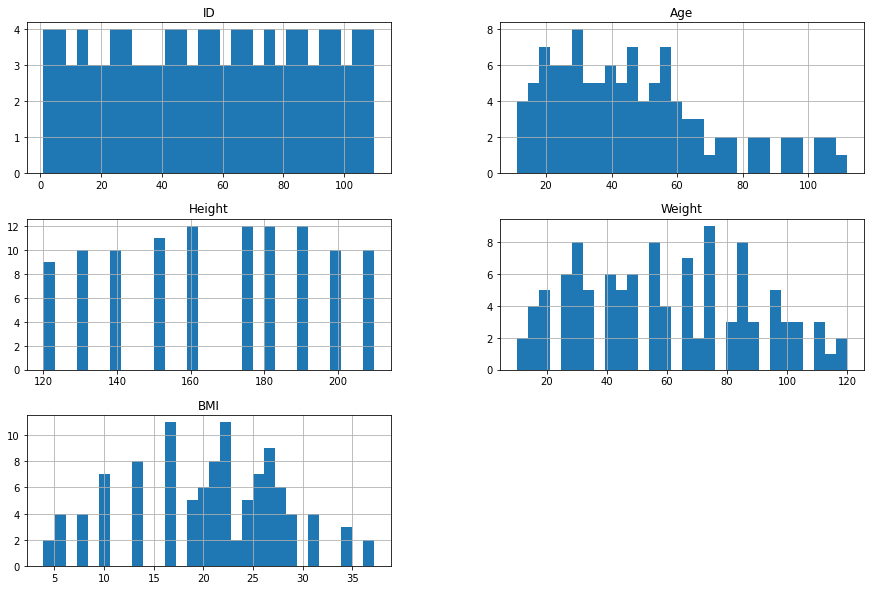

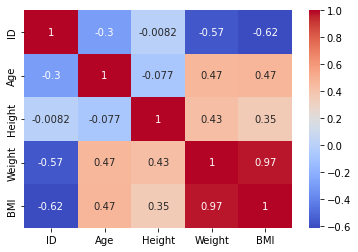

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'Obesity Classification.csv'
data = pd.read_csv(file_path)

# Display basic information
print(data.info())
print(data.head())

# Distribution of target variable
print(data['Label'].value_counts())

# Histograms of numeric features
data.hist(bins=30, figsize=(15, 10))
plt.show()

# Correlation matrix
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


In [30]:
from sklearn.preprocessing import LabelEncoder

# Fill missing values (if any)
data.fillna(method='ffill', inplace=True)

# Encode categorical variables
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

X = data.drop('Label', axis=1)
y = data['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [32]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the model with chosen hyperparameters
model = DecisionTreeClassifier(max_depth=5, min_samples_leaf=4, criterion='gini', random_state=42)

# Train the model
model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, min_samples_leaf=4, random_state=42)

In [34]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9090909090909091
Classification Report:
                precision    recall  f1-score   support

Normal Weight       1.00      0.67      0.80         6
        Obese       1.00      1.00      1.00         4
   Overweight       0.67      1.00      0.80         4
  Underweight       1.00      1.00      1.00         8

     accuracy                           0.91        22
    macro avg       0.92      0.92      0.90        22
 weighted avg       0.94      0.91      0.91        22



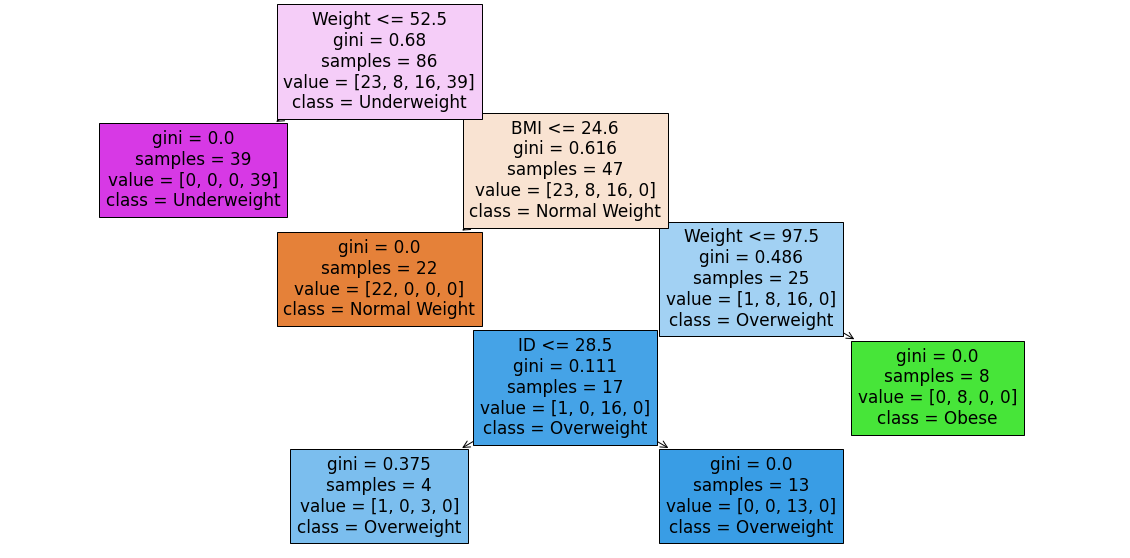

In [36]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(model, feature_names=X.columns, class_names=model.classes_, filled=True)
plt.show()


In [38]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_leaf': [2, 4, 6, 8],
    'criterion': ['gini', 'entropy']
}

# Initialize Grid Search
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                           param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

# Perform Grid Search
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Evaluate the optimized model
best_model = grid_search.best_estimator_
y_pred_optimized = best_model.predict(X_test)
print("Optimized Accuracy:", accuracy_score(y_test, y_pred_optimized))
print("Optimized Classification Report:\n", classification_report(y_test, y_pred_optimized))


Fitting 5 folds for each of 32 candidates, totalling 160 fits


/Users/ktlkr/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/ktlkr/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/ktlkr/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/ktlkr/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.war

Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 2}
Best Score: 0.9529411764705882
Optimized Accuracy: 0.9090909090909091
Optimized Classification Report:
                precision    recall  f1-score   support

Normal Weight       1.00      0.67      0.80         6
        Obese       1.00      1.00      1.00         4
   Overweight       0.67      1.00      0.80         4
  Underweight       1.00      1.00      1.00         8

     accuracy                           0.91        22
    macro avg       0.92      0.92      0.90        22
 weighted avg       0.94      0.91      0.91        22

